Resolver a Integral a seguir pelo Método da Integração de Monte Carlo e pelo Método da Integração por Importância.

$$ I = \int_{0}^{1}\ (1-x^2)^{\frac{3}{2}}\ dx$$ $$$$



Importando as bibliotecas necessárias:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Inicialização da quantidade de amostras:

In [7]:
N = 1000000
u = np.random.uniform(0, 1, N)

Para a Integral de Monte Carlo, o intervalo da integral já está padronizado $(0, 1)$, não sendo necessária nenhuma manipulação:

In [8]:
integral = np.sum(pow(1-u**2, 3/2))/N
print(f'O resultado da integral pelo Método de Monte Carlo é {integral:.4f}.')

O resultado da integral pelo Método de Monte Carlo é 0.5891.


Pelo Método da Integração por Importância, é definida uma função $g(x)$ tal que

$$\int_{a}^{b}\ g(x)\ dx = 1$$ $$$$

Foi escolhida a função $g(x) = A\cdot(1-x)$ no intervalo $(0,\ 1)$. Assim:

$$\int_{0}^{1}\ A\cdot(1-x)\ dx = 1\ \therefore\ \mathbf{A=2}$$ $$$$

É realizada a seguinte modificação:

$$I=\int_{a}^{b}\ f(x)\ dx = \int_{a}^{b}\ f(x)\cdot\frac{g(x)}{g(x)}\ dx = E_g\left[\frac{f(x)}{g(x)}\right]$$ $$$$

Para gerar amostras para $g(x)$, o Método da Inversa considera a Função de Distribuição Cumulativa de $x$:

$$F_X(x)=\int_{0}^{x}\ 2\cdot(1-t)\ dt\ \therefore\ \mathbf{F_X(x) = 2x - x^2}$$

$$U = 2x - x^2\ \rightarrow\ x^2 - 2x + U = 0$$ $$$$

Para a Inversa da Função de Distribuição Cumulativa de  x:

$$$$ $$\Delta = b^2-4ac=(-2)^2-4(1)(U)\ \therefore\ \mathbf{\Delta = 4 - 4U}$$ $$$$

$$x=\frac{2\ \pm\ \sqrt{(4 - 4U)}}{2}\ \therefore\ x = 1-\sqrt{1-U}$$ é única raiz da equação no intervalo (0, 1).
$$$$



In [9]:
x = 1 - np.sqrt(1 - u)
integral = np.sum(pow(1-x**2, 3/2)/(2*(1-x)))/N
print(f'O resultado da integral pelo Método de Importância é {integral:.4f}.')

O resultado da integral pelo Método de Importância é 0.5890.


Plotando o Gráfico com a função e a área em destaque sendo a Integral calculada considerando o Método da Integração por Importância:

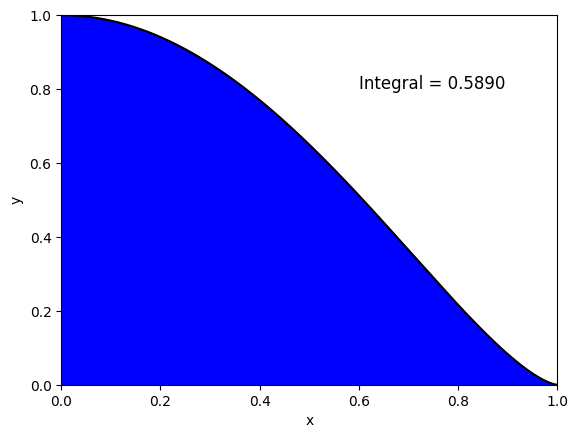

In [10]:
print('\n')
x = np.linspace(0, 1, N)
y = pow(1 - x**2, 3/2)

plt.plot(x, y, color='black')
plt.xlim(0, 1), plt.ylim(0, 1)
plt.xlabel('x'), plt.ylabel('y')

plt.text(0.6, 0.8, f'Integral = {integral:.4f}', fontsize=12, color='black')
plt.fill_between(x, y, color='blue')
plt.show()
